<a href="https://colab.research.google.com/github/spuertoUAO/Taller_1/blob/main/Taller_1_Concepto_de_complejidad_en_aprendizaje_autom%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 - Concepto de complejidad en aprendizaje automático


# Carga de Datos
El programa utiliza el conjunto de datos Iris, que consta de 150 registros de iris con cuatro atributos cada uno (longitud y ancho del sépalo y pétalo) y una de clase (setosa, versicolor o virginica).

- Hay 150 registros en el conjunto de datos Iris.
- Cada registro tiene 4 atributos: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.
- Los atributos son numéricos, representando mediciones físicas.

# Preparación y Visualización de Datos

- Los datos se cargan desde la UCI ML Repository y se visualizan mediante gráficos de caja y una matriz de dispersión.

- Los gráficos de caja muestran la distribución de cada característica para cada clase.

- La matriz de dispersión proporciona una visión general de las relaciones bivariadas entre las características.

# División de Datos

Los datos se dividen en conjuntos de entrenamiento y prueba (80% y 20% respectivamente) utilizando train_test_split de scikit-learn.

# Análisis de Complejidad de Modelos KNN
- Se evalúan diferentes modelos KNN con diferentes números de vecinos (1, 3, 5, 7, 9).

- Se mide y muestra la precisión, el recall y la exactitud de cada modelo.

# Selección del Mejor Modelo
- Se selecciona el modelo KNN con la mayor precisión como el mejor modelo.

# Matriz de Confusión y Visualización
- Se genera y muestra la matriz de confusión para evaluar el rendimiento del mejor modelo.

- Se utiliza ConfusionMatrixDisplay para una visualización más clara.

# Métricas vs. Vecinos
- Se visualizan las métricas (precisión, recall y exactitud) en función del número de vecinos.

- Se agrega una línea para representar la precisión del mejor modelo.

# Medidas de Centralidad y Dispersión para Atributos:
- Se calculan y muestran la media y la mediana para cada atributo (longitud y ancho del sépalo y pétalo).

- Se calcula y muestra la desviación estándar para cada atributo.

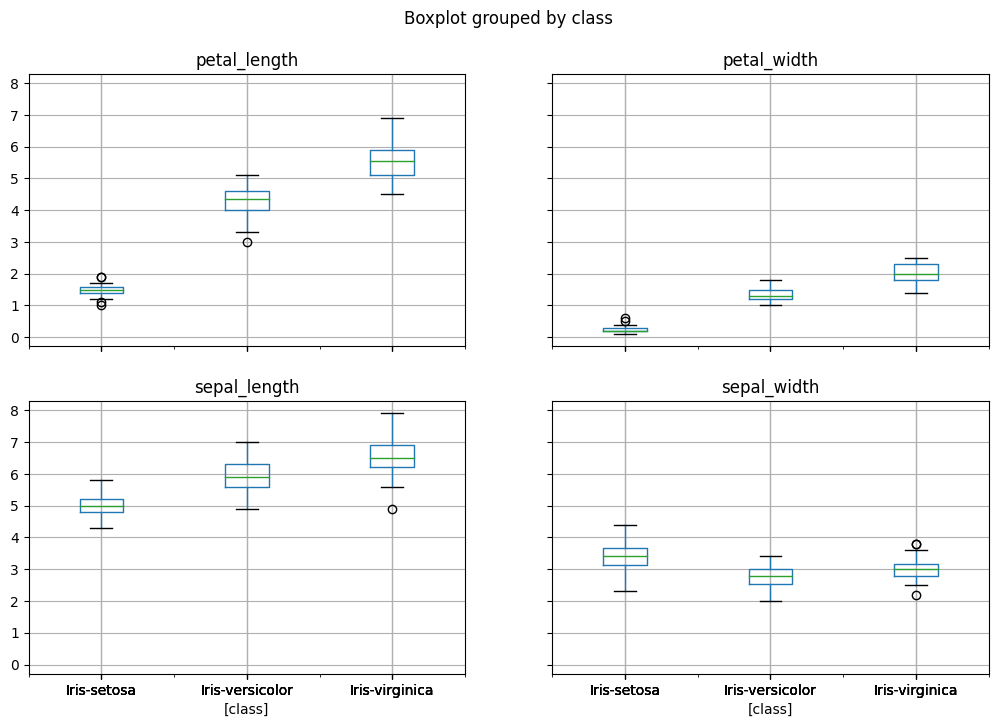

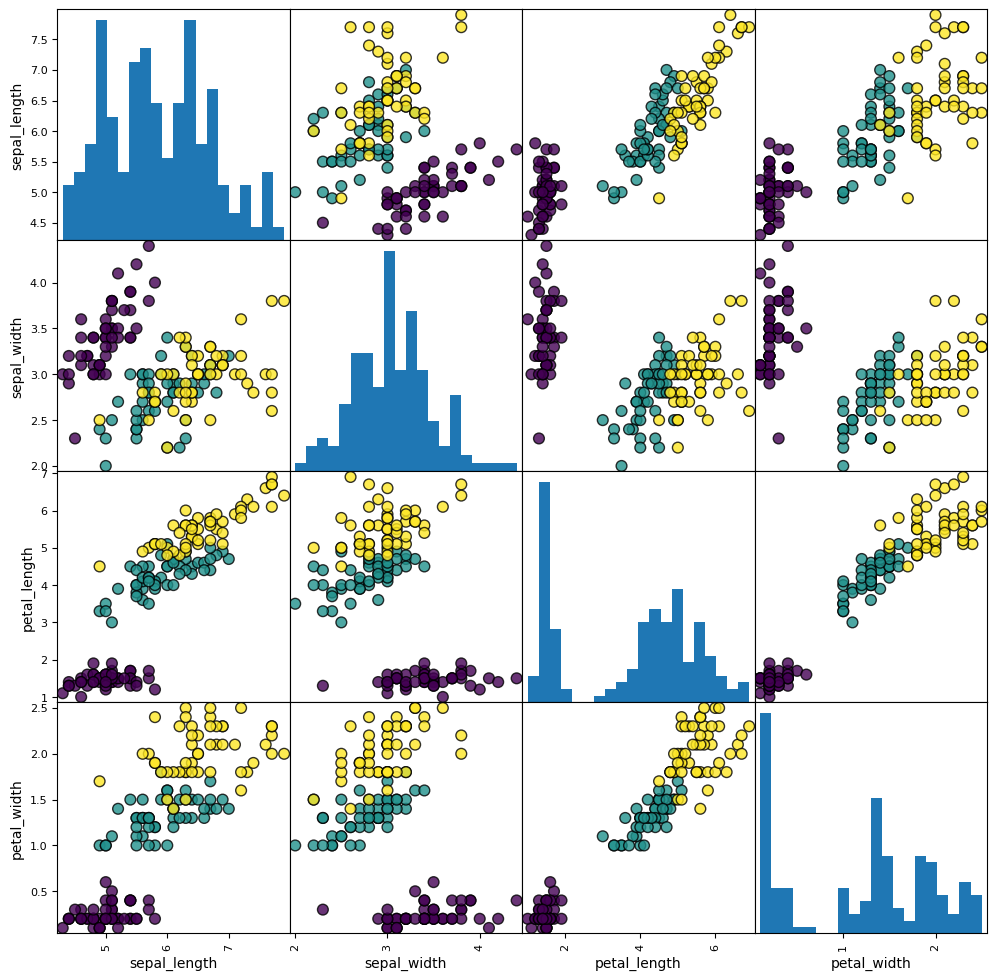

Modelo con 1 vecinos - Precisión: 100.00%, Recall: 100.00%, Precisión: 100.00%, Accuracy: 100.00%
Modelo con 3 vecinos - Precisión: 100.00%, Recall: 100.00%, Precisión: 100.00%, Accuracy: 100.00%
Modelo con 5 vecinos - Precisión: 100.00%, Recall: 100.00%, Precisión: 100.00%, Accuracy: 100.00%
Modelo con 7 vecinos - Precisión: 96.67%, Recall: 96.67%, Precisión: 96.94%, Accuracy: 96.67%
Modelo con 9 vecinos - Precisión: 100.00%, Recall: 100.00%, Precisión: 100.00%, Accuracy: 100.00%

Mejor modelo: Vecinos=1, Precisión=100.00%


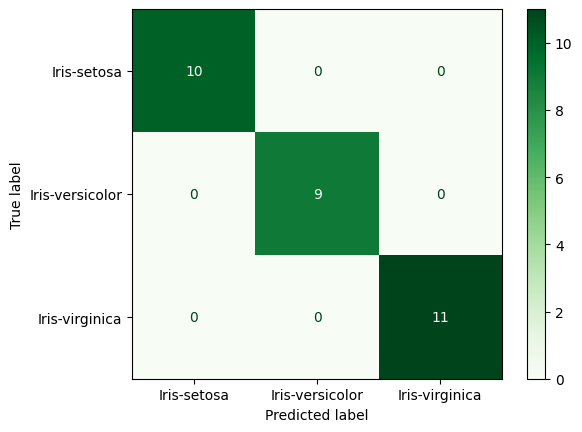

sepal_length - Media: 5.84, Mediana: 5.80
sepal_width - Media: 3.05, Mediana: 3.00
petal_length - Media: 3.76, Mediana: 4.35
petal_width - Media: 1.20, Mediana: 1.30
sepal_length - Desviación Estándar: 0.83
sepal_width - Desviación Estándar: 0.43
petal_length - Desviación Estándar: 1.76
petal_width - Desviación Estándar: 0.76


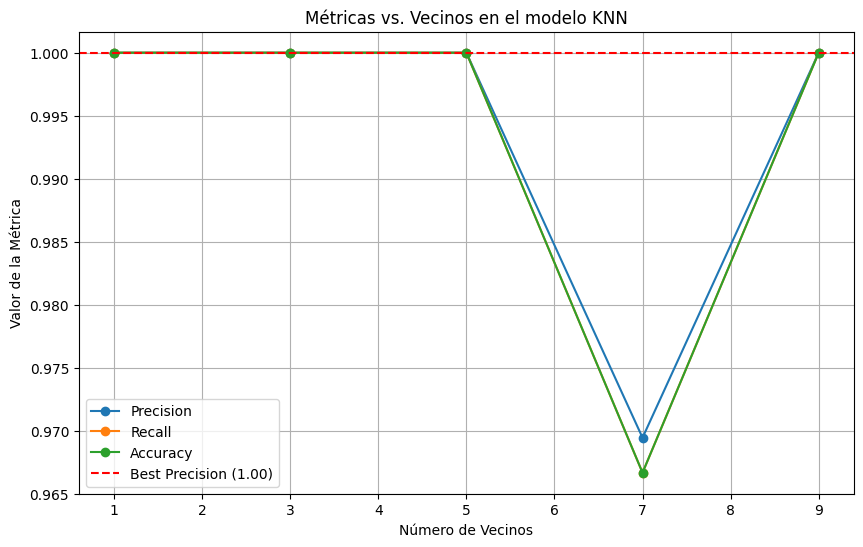

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from pandas.plotting import scatter_matrix

# Se carga el conjunto de datos Iris desde UCI ML Repository
iris_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(iris_data_url, header=None, names=column_names)

# Gráficos de caja para cada característica
iris_df.boxplot(by='class', layout=(2, 2), figsize=(12, 8))
plt.show()

# Visualizar la matriz de dispersión
scatter_matrix(iris_df, alpha=0.8, figsize=(12, 12), c=iris_df['class'].astype('category').cat.codes, cmap='viridis', diagonal='hist', marker='o', grid=True, hist_kwds={'bins': 20}, s=60, edgecolor='k')
plt.show()

# Preparar los datos para el entrenamiento del modelo
X = iris_df.drop('class', axis=1)
y = iris_df['class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analizar la complejidad de diferentes modelos KNN
neighbors_list = [1, 3, 5, 7, 9]

best_accuracy = 0
best_k = None
best_model = None
models = []

for n_neighbors in neighbors_list:
    # Inicializar y entrenar el clasificador KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train, y_train)

    # Agregar el modelo a la lista
    models.append(knn_classifier)

    # Realizar predicciones en el conjunto de prueba
    y_pred = knn_classifier.predict(X_test)

    # Medir el desempeño del modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f'Modelo con {n_neighbors} vecinos - Precisión: {accuracy * 100:.2f}%, Recall: {recall * 100:.2f}%, Precisión: {precision * 100:.2f}%, Accuracy: {accuracy * 100:.2f}%')

    # Actualizar el mejor modelo si se encuentra un rendimiento mejor
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = n_neighbors
        best_model = knn_classifier

# Imprimir el mejor modelo encontrado
print(f'\nMejor modelo: Vecinos={best_k}, Precisión={best_accuracy * 100:.2f}%')

# Obtener y analizar la matriz de confusión para el mejor modelo
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=iris_df['class'].unique())
disp.plot(cmap='Greens', values_format='d')
plt.show()

# Calcular la precisión del mejor modelo fuera del bucle
best_precision = precision_score(y_test, best_model.predict(X_test), average='weighted', labels=iris_df['class'].unique())

# Visualizar métricas vs. Vecinos
plt.figure(figsize=(10, 6))
plt.plot(neighbors_list, [precision_score(y_test, knn_classifier.predict(X_test), average='weighted', labels=iris_df['class'].unique()) for knn_classifier in models], label='Precision', marker='o')
plt.plot(neighbors_list, [recall_score(y_test, knn_classifier.predict(X_test), average='weighted', labels=iris_df['class'].unique()) for knn_classifier in models], label='Recall', marker='o')
plt.plot(neighbors_list, [accuracy_score(y_test, knn_classifier.predict(X_test)) for knn_classifier in models], label='Accuracy', marker='o')

# Obtener medidas de centralidad para cada atributo
for attribute in column_names[:-1]:  # Excluir la columna 'class'
    attribute_values = iris_df[attribute]
    mean_value = attribute_values.mean()
    median_value = attribute_values.median()

    print(f'{attribute} - Media: {mean_value:.2f}, Mediana: {median_value:.2f}')

# Obtener medidas de dispersión para cada atributo
for attribute in column_names[:-1]:  # Excluir la columna 'class'
    attribute_values = iris_df[attribute]
    std_deviation = attribute_values.std()

    print(f'{attribute} - Desviación Estándar: {std_deviation:.2f}')




# Línea adicional para representar la precisión del mejor modelo
plt.axhline(y=best_precision, color='r', linestyle='--', label=f'Best Precision ({best_precision:.2f})')

plt.title('Métricas vs. Vecinos en el modelo KNN')
plt.xlabel('Número de Vecinos')
plt.ylabel('Valor de la Métrica')
plt.legend()
plt.grid(True)
plt.show()


# ¿Cómo se analizó la complejidad de diferentes modelos KNN y cuál podría ser el mejor modelo?

* Se utilizaron modelos KNN con diferentes números de vecinos (1, 3, 5, 7, 9).
* Se midió la precisión, el recall y la exactitud para cada modelo.
* El modelo con la mayor precisión se seleccionó como el mejor.

**El mejor modelo KNN se selecciona con base en la precisión**

En el proyecto se realiza un bucle sobre diferentes números de vecinos (1, 3, 5, 7, 9), y para cada número de vecinos, se entrena un modelo KNN y se evalúa su rendimiento en el conjunto de prueba.

*El rendimiento se mide utilizando la precisión, el recall y la exactitud.*

# ¿Cómo se aplicó el análisis de complejidad bajo Confusion Matrix y Visualización Confusion Matrix?

* Se generó y visualizó una matriz de confusión para el mejor modelo.
* La matriz de confusión proporciona información detallada sobre el rendimiento del modelo en términos de clasificación.

# ¿Cómo se implementaron y para qué sirven las métricas recall, precisión y exactitud?

* Las métricas se implementaron para evaluar el rendimiento de los modelos KNN.

Precisión: Proporción de predicciones positivas correctas sobre el total de predicciones positivas.

Recall: Proporción de instancias positivas que se han identificado correctamente.

Exactitud: Proporción de predicciones correctas en general.

# ¿De acuerdo con las métricas recall, precisión y exactitud ¿Qué tan bueno es el modelo para realizar la tarea de predicción?

Para determinar qué tan bueno es el modelo, es necesario examinar los valores específicos de las métricas, para determinar qué tan bueno es el modelo en la tarea de predicción de especies de iris


